<a id = 'toc'></a>
# Table of Contents

- ### [Data](#data)
- ### [K-Means](#kmeans)
- ### [EM-Algorithm](#em_algorithm)

<a id = 'data'></a>
# Data

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from itertools import cycle, islice
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

plt.rcParams['figure.figsize'] = 12, 8

In [8]:
np.random.seed(11)

n_samples = 1500

noisy_circles = datasets.make_circles(n_samples = n_samples, factor = .5, noise = .05)[0]
noisy_moons = datasets.make_moons(n_samples = n_samples, noise = .05)[0]
noisy_blobs = datasets.make_blobs(n_samples = n_samples, random_state = 11)[0]
noisy_random = np.random.rand(n_samples, 2)

X, y = datasets.make_blobs(n_samples = n_samples, random_state = 11)
change_matrix = [[0.6, -0.6], [-0.4, 0.8]]
noisy_ribbon = np.dot(X, change_matrix)

noisy_std = datasets.make_blobs(n_samples = n_samples, cluster_std = [1.0, 2.5, 0.5]
                            , random_state = 11)[0]

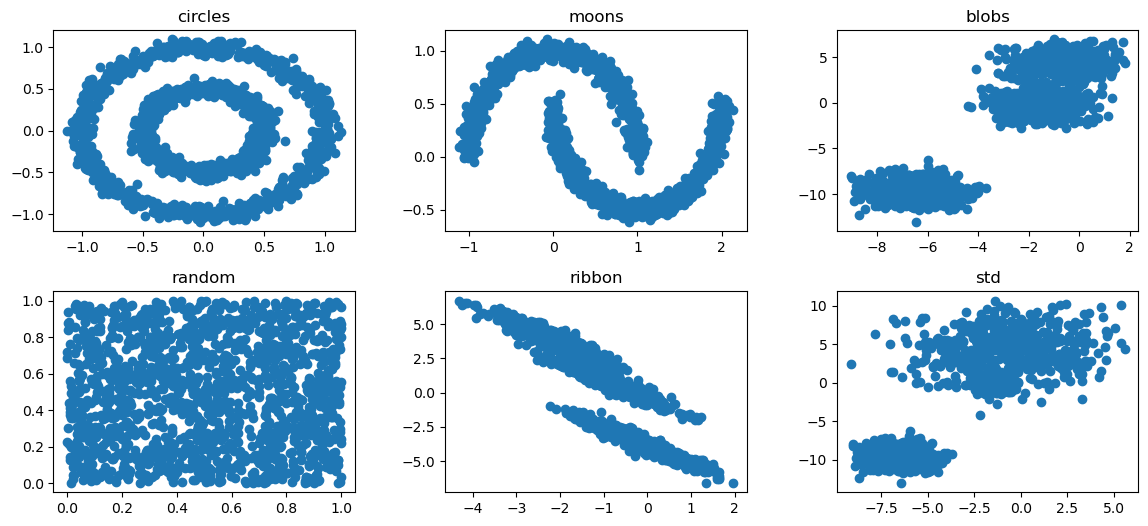

In [9]:
datasets_list = [noisy_circles, noisy_moons, noisy_blobs, noisy_random, noisy_ribbon, noisy_std]
datasets_names_list = ['circles', 'moons', 'blobs', 'random', 'ribbon', 'std']

fig, axes = plt.subplots(2, 3, figsize = (14, 6))
fig.subplots_adjust(hspace = .3, wspace = .3)

for idx, data in enumerate(datasets_list):
    if idx // 3 == 0:
        axes[0][idx].scatter(data[:, 0], data[:, 1])
        axes[0][idx].set_title(datasets_names_list[idx])
    else: #idx // 3 == 1:
        axes[1][idx-3].scatter(data[:, 0], data[:, 1])
        axes[1][idx-3].set_title(datasets_names_list[idx])
plt.show()

[UP](#toc)

<a id = 'kmeans'></a>
# K-Means

- [Inertia](#kmeans_inertia)
- [Model](#kmeans_model)

<a id = 'kmeans_inertia'></a>
<left>
<div style="color:white;
           display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">Inertia
</h2>
</div>    
</left>

In [10]:
from itertools import product
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

inertia_list = []
n_clusters = range(1, 11)
kmeans_params = list(product(n_clusters, datasets_list))

for param in kmeans_params:
    kmeans = KMeans(n_clusters = param[0], max_iter = 300, init = 'k-means++'
                   , tol = .0001, algorithm = 'elkan', random_state = 11)
    kmeans.fit(param[1])
    inertia_list.append(kmeans.inertia_)

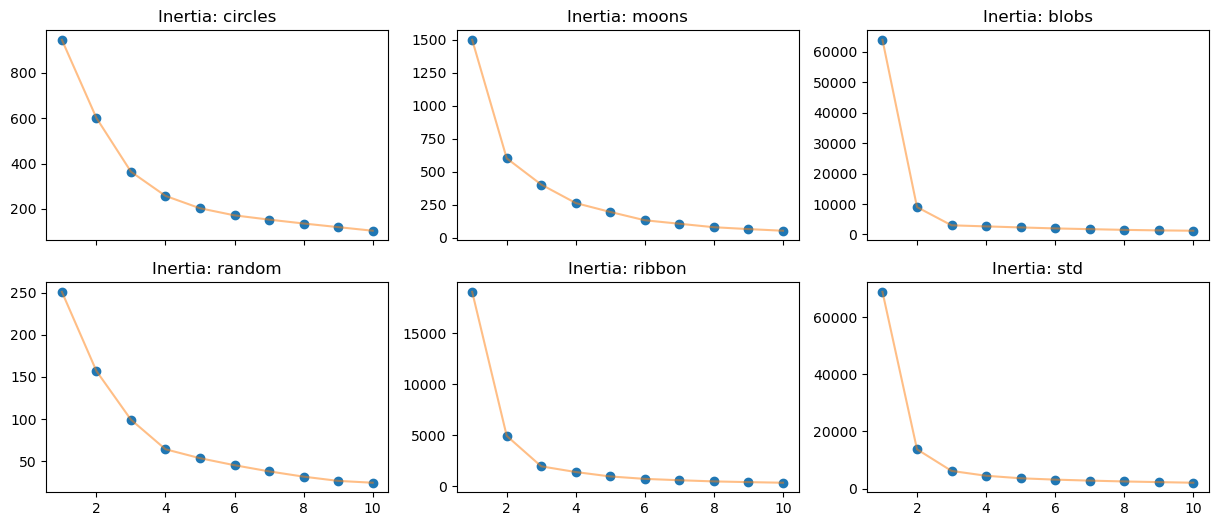

In [11]:
fig, axes = plt.subplots(2, 3, figsize = (15, 6), sharex = True)
for n_sample in range(0, len(datasets_list)):
    temp_list = [inertia_list[i] for i in range(n_sample, len(inertia_list), 6)]
    if n_sample // 3 == 0:
        axes[0][n_sample].plot(np.arange(1, 11), temp_list, 'o')
        axes[0][n_sample].plot(np.arange(1, 11), temp_list, '-', alpha = .5)
        axes[0][n_sample].set_title(f'Inertia: {datasets_names_list[n_sample]}')
    else:
        axes[1][n_sample - 3].plot(np.arange(1, 11), temp_list, 'o')
        axes[1][n_sample - 3].plot(np.arange(1, 11), temp_list, '-', alpha = .5)
        axes[1][n_sample - 3].set_title(f'Inertia: {datasets_names_list[n_sample]}')
plt.show()

<a id = 'kmeans_model'></a>
<left>
<div style="color:white;
           display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">Model
</h2>
</div>    
</left>

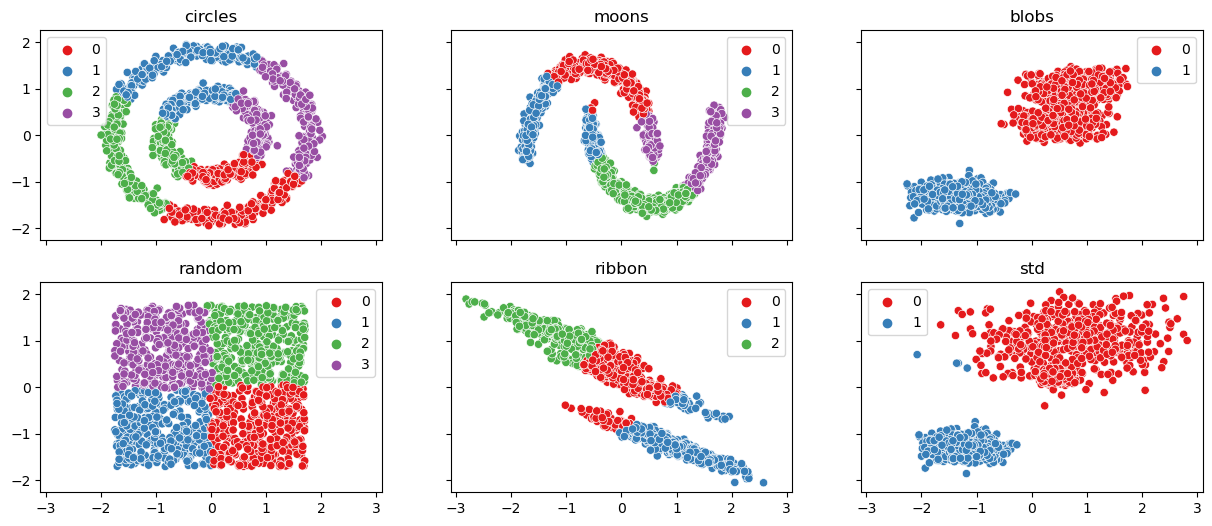

In [12]:
datasets_params_list = [
    (noisy_circles, {'n_clusters': 4}),
    (noisy_moons, {'n_clusters': 4}),
    (noisy_blobs, {'n_clusters': 2}),
    (noisy_random, {'n_clusters': 4}),
    (noisy_ribbon, {'n_clusters': 3}),
    (noisy_std, {'n_clusters': 2})]

fig, axes = plt.subplots(2, 3, figsize = (15, 6), sharex = True, sharey = True)

for i, (x_train, kmeans_params) in enumerate(datasets_params_list):
    x_train = StandardScaler().fit_transform(x_train)
    k_means = KMeans(n_clusters = kmeans_params['n_clusters'], tol = 0.001
                     , init = 'k-means++', algorithm = 'elkan', random_state = 11)
    k_means.fit(x_train)
    y_pred = np.hstack([x_train, k_means.labels_.reshape(-1, 1)])
    
    if i // 3 == 0:
        sns.scatterplot(x = y_pred[:, 0], y = y_pred[:, 1], hue = y_pred[:, 2].astype(np.int)
                        , ax = axes[0][i], palette = 'Set1')
        axes[0][i].set_title(datasets_names_list[i])
        
    else:
        sns.scatterplot(x = y_pred[:, 0], y = y_pred[:, 1], hue = y_pred[:, 2].astype(np.int)
                        , ax = axes[1][i-3], palette = 'Set1')
        axes[1][i-3].set_title(datasets_names_list[i])

plt.show()

[UP](#toc)

<a id = 'em_algorithm'></a>
# EM-Algorithm

[UP](#toc)

[UP](#toc)

<left>
<div style="color:white;
           display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">Data
</h2>
</div>    
</left>

<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#212121;
           font-size:110%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#FFFFFF;">Title
</h2>
</div>    
</center>

Description Text

<center>
<div style="color:white;
           display:fill;
           border: 0px;
           border: 2px solid #AAA;
           font-size:110%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#212121;">Subtitle
</h2>
</div>    
</center>

<div class = 'alert alert-info alert-block'>
    <b>Interpretation:</b>  Text
</div>